In [8]:
import vizlo, clingo
import matplotlib.pyplot as plt

ctl = vizlo.VizloControl(["0"])
ctl.add("base", [], "{a}. {b}. :- a.")
ctl.ground([("base", [])])

Let's first explore the program in its entirety by printing
the entire solving process. This is the default behaviour. By default, we only show the
part of a partial model that gets added at that solving step. To visualize the partial painting,
we draw everything here using the `show_entire_model` argument.

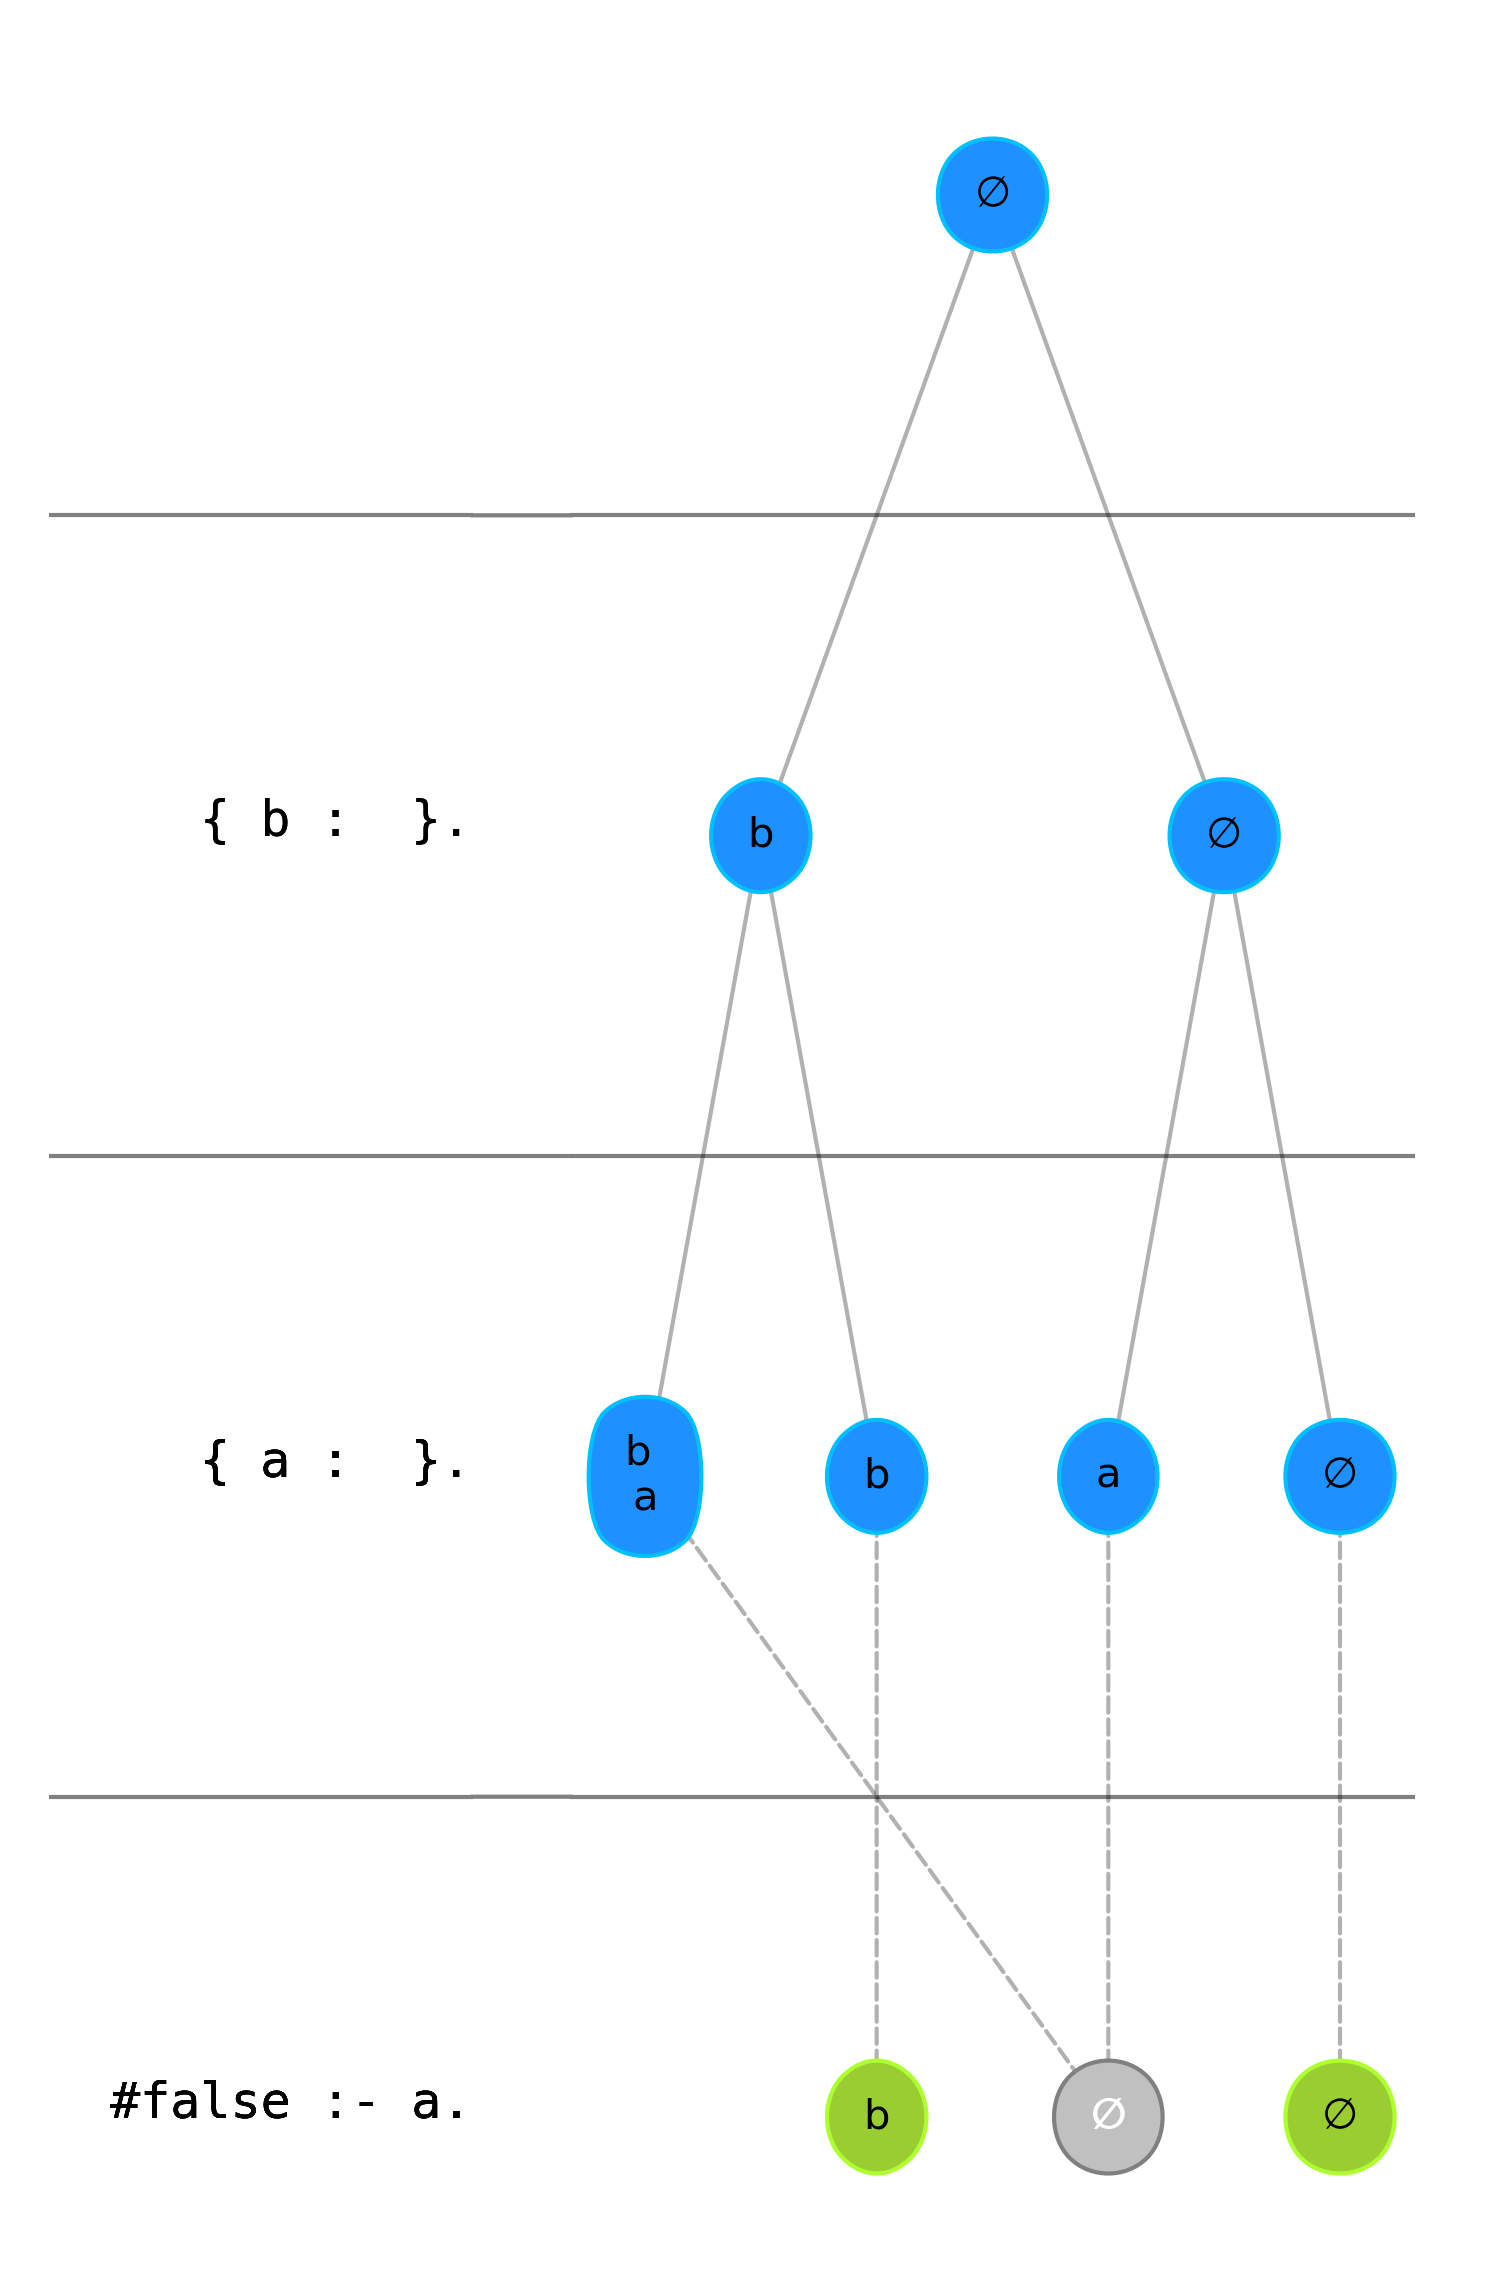

In [9]:
ctl.paint(show_entire_model=True)
plt.show()

That's quite helpful. Because the space of a logic program might become quite big,
the visualization might become too big in both computation and visualization.
That's were the function `add_to_painter` comes into play. Here, we can add specific
stable models to a program and we will only see the paths that lead to them:

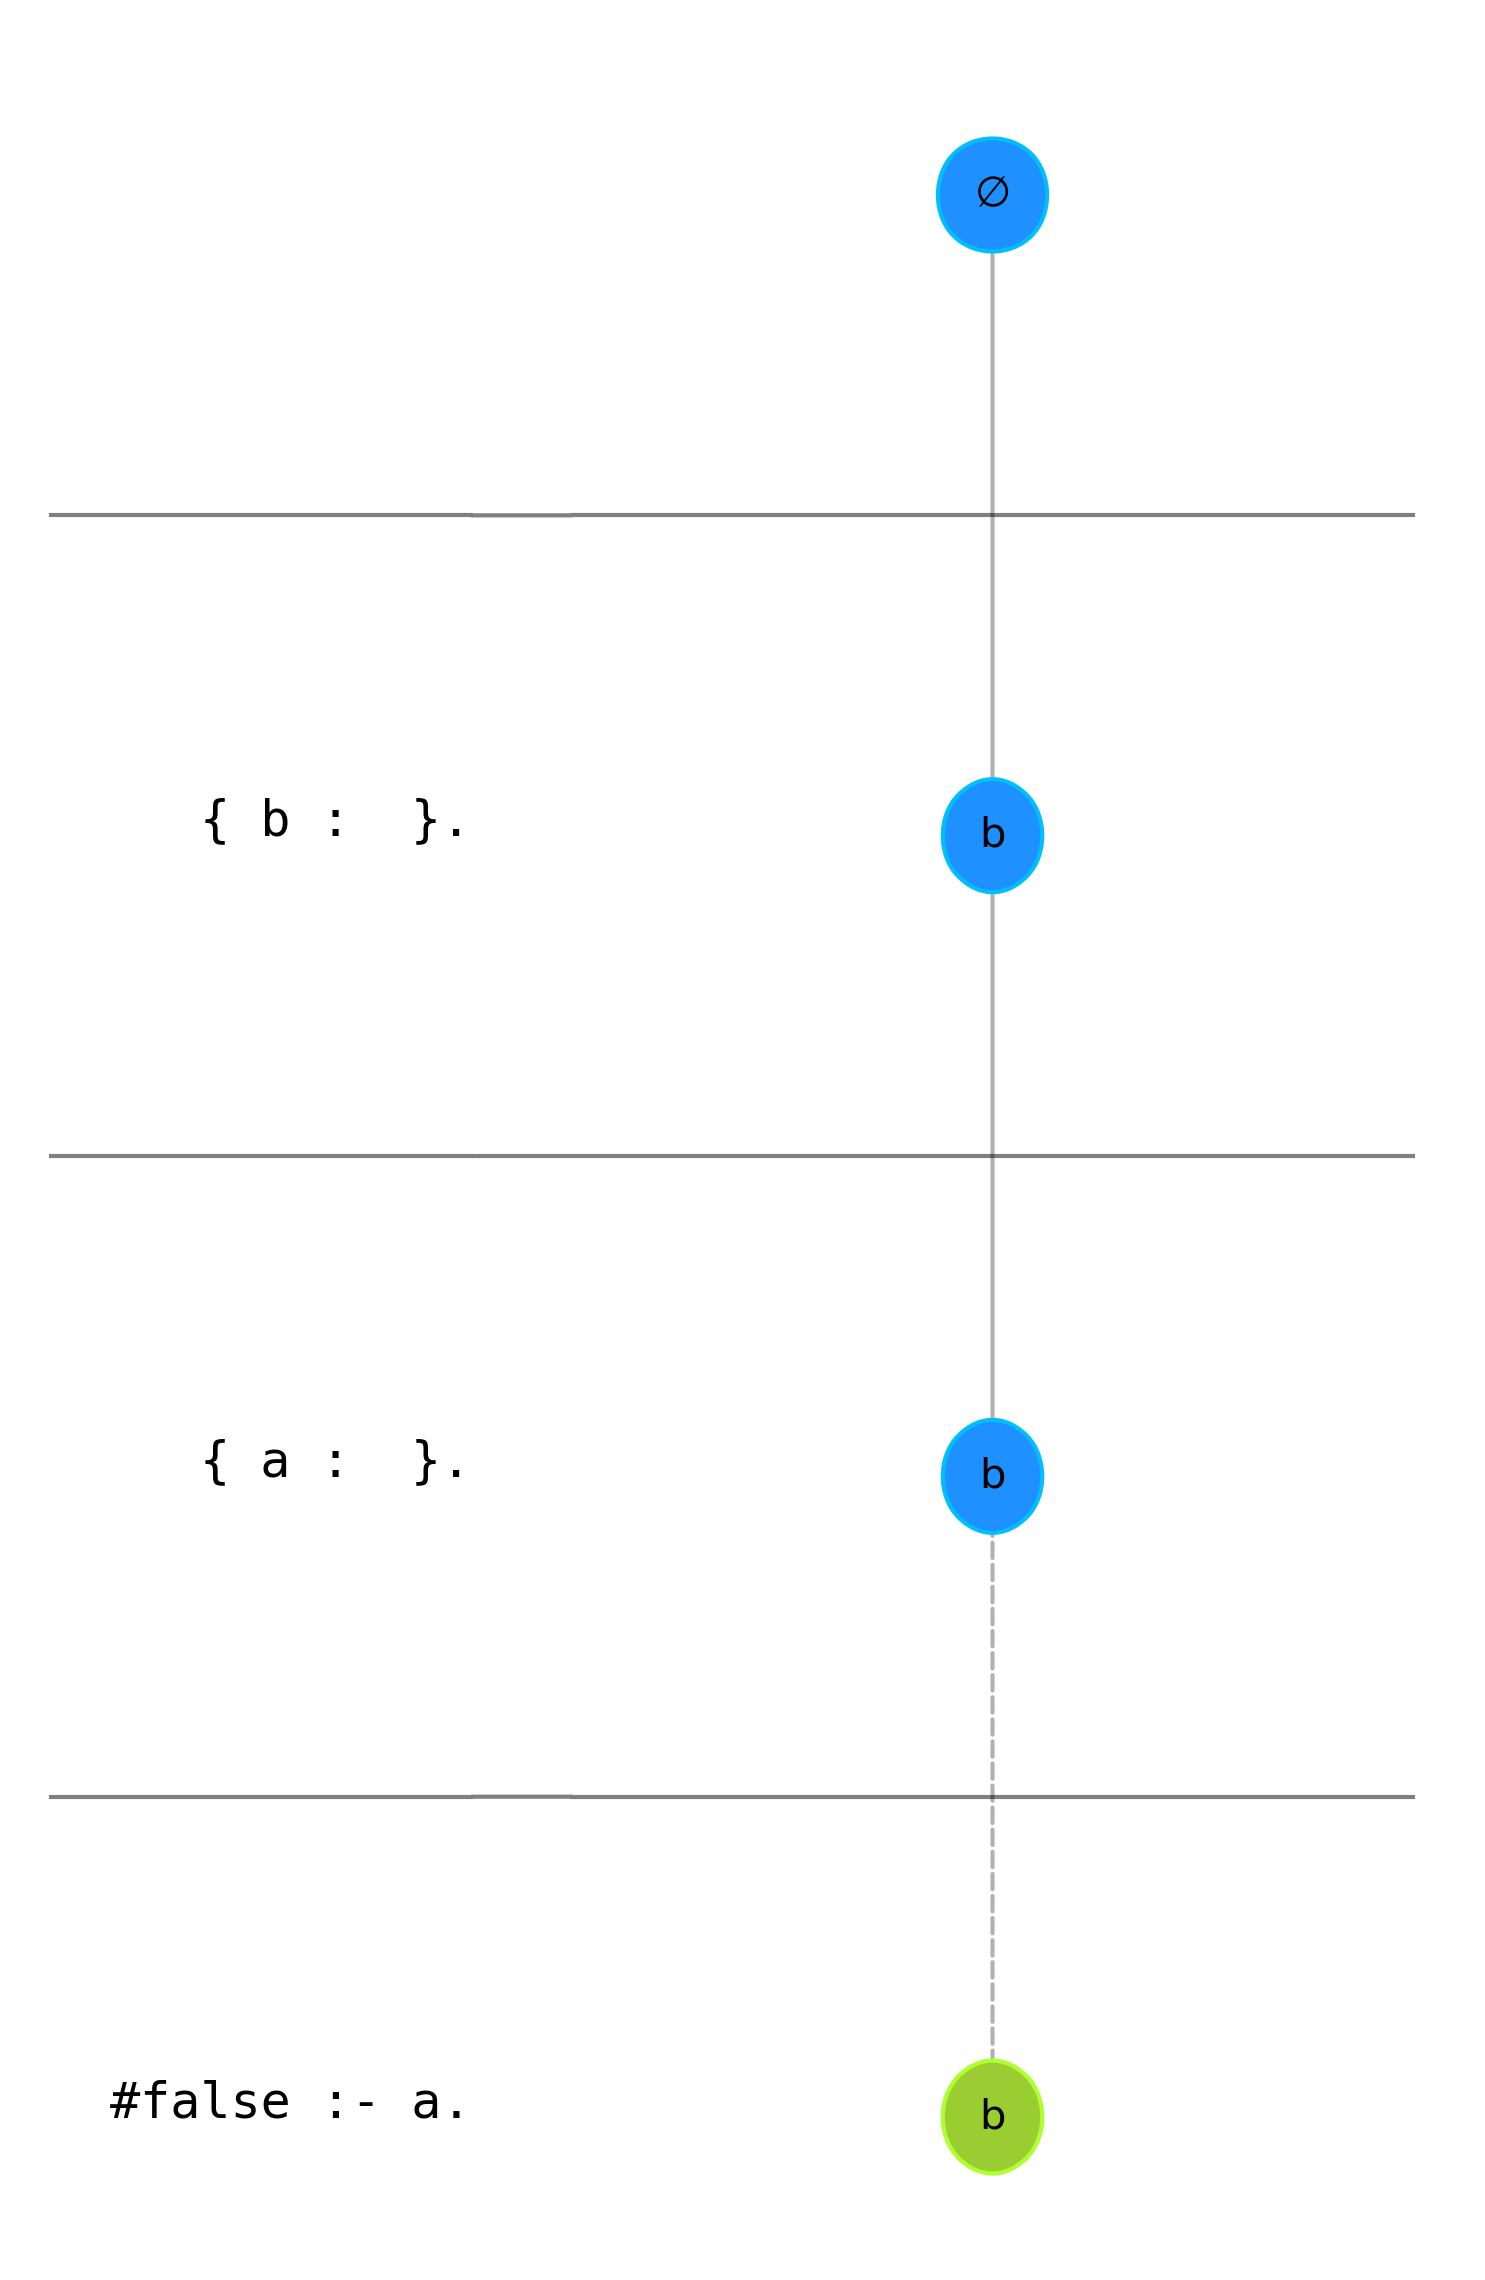

In [10]:
with ctl.solve(yield_=True) as handle:
    for m in handle:
        if m.contains(clingo.Function("b",[])):
            ctl.add_to_painter(m)

ctl.paint(show_entire_model=True)
plt.show()